In [ ]:
#import
import numpy as np
np.random.seed(1337)
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Bidirectional
import math
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

from google.colab import files
uploaded = files.upload()


Saving FPT.csv to FPT.csv


In [ ]:
# Load và đọc data
df = pd.read_csv("FPT.csv")
df.head()

,DATE,CLOSING PRICE,TICKER,OPEN,HIGH,LOW,VOLUME
0,12/6/2020,47000,FPT,45000,47000,45000,3145450
1,11/6/2020,46000,FPT,48800,48800,46000,4278060
2,10/6/2020,48800,FPT,49000,49000,48400,1307540
3,9/6/2020,48950,FPT,49600,49650,48900,1491540
4,8/6/2020,49350,FPT,49000,50000,49000,4113250


In [ ]:
#Nhất quán định dạng data và kiểm tra null
df["CLOSING PRICE"] = pd.to_numeric(df["CLOSING PRICE"])
df["HIGH"] = pd.to_numeric(df["HIGH"])
df["LOW"] = pd.to_numeric(df["LOW"])
df["DATE"] = df["DATE"].values[::-1]
df["CLOSING PRICE"] = df["CLOSING PRICE"].values[::-1]
df["OPEN"] = df["OPEN"].values[::-1]
df["HIGH"] = df["HIGH"].values[::-1]
df["LOW"] = df["LOW"].values[::-1]
df["VOLUME"] = df["VOLUME"].values[::-1]
df.head()

,DATE,CLOSING PRICE,TICKER,OPEN,HIGH,LOW,VOLUME
0,12/6/2015,45100,FPT,44900,45300,44900,753350
1,15/06/2015,45000,FPT,45400,45400,44800,341650
2,16/06/2015,44500,FPT,45000,45200,44500,479370
3,17/06/2015,44400,FPT,44400,44600,44300,483360
4,18/06/2015,44500,FPT,44400,45000,44400,324300


In [ ]:
#Chia training set và data set

data = df.filter(['CLOSING PRICE'] + ['VOLUME'] +['OPEN'] +['HIGH'] +['LOW'])
dataset = data.values
a = df.filter(['CLOSING PRICE'])
training_data_len = math.ceil(len(dataset ) * .8)

kq = a.values
training_data_len
test_len =len(dataset) -  training_data_len
kq.size

1252

In [ ]:
#Scale data
scaler = MinMaxScaler(feature_range =(0,1))
scaler2 = MinMaxScaler(feature_range =(0,1))
scaled_kq = scaler2.fit_transform(kq)
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.24609375, 0.09792138, 0.24045802, 0.21856867, 0.256     ],
       [0.2421875 , 0.03704306, 0.25954198, 0.22243714, 0.252     ],
       [0.22265625, 0.0574078 , 0.24427481, 0.21470019, 0.24      ],
       ...,
       [0.390625  , 0.17986979, 0.39694656, 0.36170213, 0.396     ],
       [0.28125   , 0.61912233, 0.38931298, 0.35396518, 0.3       ],
       [0.3203125 , 0.45164262, 0.24427481, 0.28433269, 0.26      ]])

In [ ]:
# Chia training set theo x và y
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(60, len(train_data) - 3):
    x_train.append(train_data[i-60:i, :])
    y_train.append(scaled_kq[i + 3, 0])


In [ ]:
scaled_kq

array([[0.24609375],
       [0.2421875 ],
       [0.22265625],
       ...,
       [0.390625  ],
       [0.28125   ],
       [0.3203125 ]])

In [ ]:
#Chuyển sang mảng numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape du lieu de co the su dung vao model LSTM cua python
temp = x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 5))
temp.shape

(939, 60, 5)

In [ ]:
#xay dung LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50), input_shape=(60, 5)))
model.add(Dense(1))
#Su dung model
model.compile(optimizer ='adam', loss = 'mean_squared_error')
#Bat dau huan luyen
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
939/939 [==============================] - 28s 30ms/step - loss: 0.0080
Epoch 2/5
939/939 [==============================] - 27s 29ms/step - loss: 0.0062
Epoch 3/5
939/939 [==============================] - 27s 29ms/step - loss: 0.0060
Epoch 4/5
939/939 [==============================] - 27s 29ms/step - loss: 0.0055
Epoch 5/5
939/939 [==============================] - 28s 30ms/step - loss: 0.0052


In [ ]:
#Tao test set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = kq[training_data_len + 3:,:]
for i in range(60, len(test_data) - 3):
    x_test.append(test_data[i-60:i, :])

In [ ]:
#Chuyen sang 3d array de su dung voi LSTM
x_test = np.array(x_test)
x_test.shape


(247, 60, 5)

In [ ]:
#Tao hypothesis
predictions = model.predict(x_test)
predictions = scaler2.inverse_transform(predictions)



In [ ]:
predictions.shape

(247, 1)

In [ ]:
rmse =  np.sqrt(np.mean((predictions - y_test)**2))

rmse

2243.166679091622

In [ ]:
mape = (np.mean(np.abs((y_test - predictions) / y_test))) * 100
mape

3.4630245888063986

999
      CLOSING PRICE   Predictions
1005          45400  44299.066406
1006          45400  43972.160156
1007          45150  43869.414062
1008          46500  44041.863281
1009          46150  44592.636719
...             ...           ...
1247          49350  47616.777344
1248          48950  48437.324219
1249          48800  48131.800781
1250          46000  48295.933594
1251          47000  49556.402344

[247 rows x 2 columns]


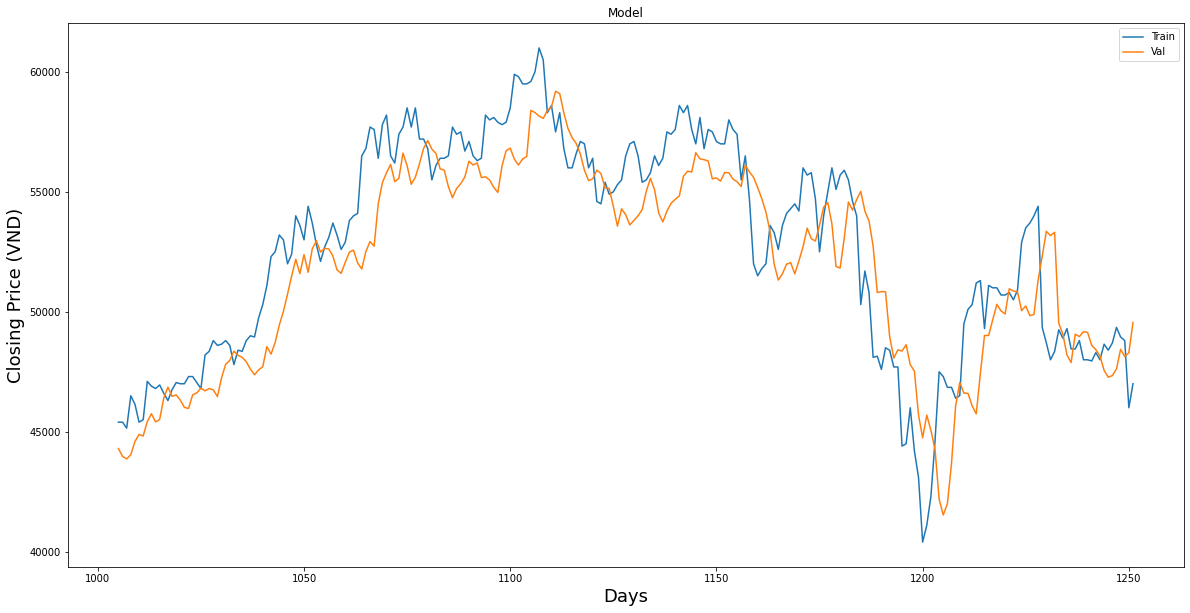

In [ ]:
#Plot/Create the data for the graph
train = a[3:training_data_len]
print(train.size)
valid = a[training_data_len + 3:]
valid['Predictions'] = predictions
print(valid)
# 
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Closing Price (VND)', fontsize=18)
plt.plot(valid[['CLOSING PRICE', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()